# Intro
This notebook draft is to explore the [dutch energy dataset](https://www.kaggle.com/lucabasa/dutch-energy).

# Getting started
 - Download the dataset and store at `dutch-energy` directory

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

# Exploratory analysis 2019 electricity

In [2]:
stedin_elec_2019 = pd.read_csv("../data/dutch-energy/Electricity/stedin_electricity_2019.csv")
liander_elec_2019 = pd.read_csv("../data/dutch-energy/Electricity/liander_electricity_01012019.csv")
enexis_elec_2019 = pd.read_csv("../data/dutch-energy/Electricity/enexis_electricity_01012019.csv")

In [3]:
stedin_elec_2019.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,8716874000009,Stedin Utrecht,Egelshoek,1213RC,1231AB,HILVERSUM,30,90.00,100,80,3x25,5909,90.00,53.33
1,8716874000009,Stedin Utrecht,Rembrandtlaan,1231AC,1231AC,LOOSDRECHT,17,100.00,100,41,1x25,3062,94.12,76.47
2,8716874000009,Stedin Utrecht,Rembrandtlaan,1231AD,1231AD,LOOSDRECHT,17,100.00,100,47,3x25,3959,82.35,52.94
3,8716874000009,Stedin Utrecht,Jan Steenlaan,1231AE,1231AE,LOOSDRECHT,20,100.00,100,45,3x25,4230,90.00,45.00
4,8716874000009,Stedin Utrecht,Pieter de Hooghlaan,1231AG,1231AG,LOOSDRECHT,17,94.12,100,71,1x25,3180,94.12,88.24


In [4]:
liander_elec_2019.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Liander NB,LIANDER,De Ruyterkade Steigers,1011AA,1011AB,AMSTERDAM,36.0,100.0,38.89,100.0,3x25,16589.0,44.44,25.00
1,Liander NB,LIANDER,De Ruyterkade,1011AC,1011AC,AMSTERDAM,39.0,100.0,56.41,100.0,3x80,22755.0,48.72,35.90
2,Liander NB,LIANDER,Oosterdokskade,1011AD,1011AD,AMSTERDAM,19.0,100.0,5.26,100.0,3x25,4026.0,47.37,0.00
3,Liander NB,LIANDER,Oosterdokskade AB,1011AE,1011AE,AMSTERDAM,19.0,100.0,10.53,100.0,3x25,3184.0,31.58,5.26
4,Liander NB,LIANDER,Prins Hendrikkade,1011AG,1011AG,AMSTERDAM,14.0,100.0,92.86,100.0,1x35,21826.0,57.14,35.71


In [5]:
enexis_elec_2019.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Enexis B.V.,ENEXIS,Sasdijk,4251AA,4251AA,WERKENDAM,42,100.00,100,50.00,3x25,5459.71,28.82,11.90
1,Enexis B.V.,ENEXIS,Sasdijk,4251AB,4251AB,WERKENDAM,17,100.00,100,41.18,1x25,4614.24,34.24,41.18
2,Enexis B.V.,ENEXIS,Sasdijk,4251AC,4251AC,WERKENDAM,11,81.82,100,63.64,1x25,2520.73,34.31,36.36
3,Enexis B.V.,ENEXIS,Sasdijk,4251AD,4251AD,WERKENDAM,28,100.00,100,39.29,3x25,4275.46,38.34,28.57
4,Enexis B.V.,ENEXIS,Heuveltje,4251AE,4251AG,WERKENDAM,21,90.48,100,42.86,1x25,4620.24,60.18,33.33


In [6]:
# replacing the messed up city name
liander_elec_2019['city'] = liander_elec_2019['city'].replace(["AMSTERDAM ZUID00ST"], "AMSTERDAM ZUIDOOST")
stedin_elec_2019['city'] = stedin_elec_2019['city'].replace(["'S GRAVENHAGE"], "'S-GRAVENHAGE")

In [7]:
city_unique_stedin = np.sort(stedin_elec_2019["city"].unique())
print("number of cities stedin:", len(city_unique_stedin))

number of cities stedin: 262


In [8]:
city_unique_liander = np.sort(liander_elec_2019["city"].unique())
print("number of cities liander:", len(city_unique_liander))

number of cities liander: 1100


In [9]:
city_unique_enexis = np.sort(enexis_elec_2019["city"].unique())
print("number of cities enexis:", len(city_unique_enexis))

number of cities enexis: 1066


In [10]:
city_annual_elec_liander = liander_elec_2019.groupby(["city"],sort=True)[["annual_consume"]].sum().reset_index()
print("let's show some of the most elctricity hungary cities:")
city_annual_elec_liander = city_annual_elec_liander.sort_values(by=["annual_consume"], ascending=False)
city_annual_elec_liander[:10]

let's show some of the most elctricity hungary cities:


,city,annual_consume
42,AMSTERDAM,54836591.0
34,ALMERE,17221147.0
56,ARNHEM,13505892.0
646,NIJMEGEN,13213396.0
338,HAARLEM,12966529.0
53,APELDOORN,12614274.0
526,LEIDEN,9781729.0
410,HILVERSUM,8108207.0
31,ALKMAAR,7789302.0
524,LEEUWARDEN,7280218.0


In [11]:
city_annual_elec_enexis = enexis_elec_2019.groupby(["city"],sort=True)[["annual_consume"]].sum().reset_index()
print("let's show some of the most elctricity hungary cities:")
city_annual_elec_enexis = city_annual_elec_enexis.sort_values(by=["annual_consume"], ascending=False)
city_annual_elec_enexis[:10]

let's show some of the most elctricity hungary cities:


,city,annual_consume
241,EINDHOVEN,17252205.96
333,GRONINGEN,15674123.34
877,TILBURG,14219427.41
253,ENSCHEDE,13254844.45
117,BREDA,11889112.65
1065,ZWOLLE,10448247.12
2,'S-HERTOGENBOSCH,9813492.04
533,MAASTRICHT,9595342.27
388,HENGELO OV,7628946.34
386,HELMOND,7326938.00


In [12]:
city_annual_elec_stedin = stedin_elec_2019.groupby(["city"],sort=True)[["annual_consume"]].sum().reset_index()
print("let's show some of the most elctricity hungary cities:")
city_annual_elec_stedin = city_annual_elec_stedin.sort_values(by=["annual_consume"], ascending=False)
city_annual_elec_stedin[:10]

let's show some of the most elctricity hungary cities:


,city,annual_consume
1,'S-GRAVENHAGE,37657660
191,ROTTERDAM,34096140
223,UTRECHT,20207704
11,AMERSFOORT,9501045
257,ZOETERMEER,9292640
52,DORDRECHT,7111490
47,DELFT,7106692
64,GOUDA,5283756
147,NIEUWEGEIN,5201578
197,SCHIEDAM,5088522


In [13]:
city_annual_all = pd.concat([city_annual_elec_stedin, city_annual_elec_liander, city_annual_elec_enexis])
city_annual_all = city_annual_all.sort_values(by=["annual_consume"], ascending=False)
city_annual_all[:10]

,city,annual_consume
42,AMSTERDAM,54836591.00
1,'S-GRAVENHAGE,37657660.00
191,ROTTERDAM,34096140.00
223,UTRECHT,20207704.00
241,EINDHOVEN,17252205.96
34,ALMERE,17221147.00
333,GRONINGEN,15674123.34
877,TILBURG,14219427.41
56,ARNHEM,13505892.00
253,ENSCHEDE,13254844.45


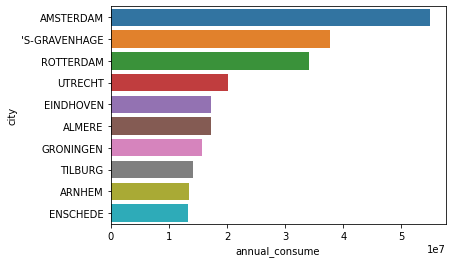

In [17]:
ax = sns.barplot(x="annual_consume", y="city", data=city_annual_all[:10], orient="h")
plt.show()